In [111]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.

In [112]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-Control-062321','gfdl.ncrc4-intel16-prod'
#case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022','gfdl.ncrc4-intel19-prod'

In [113]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
if short_casename=="gzCOBALT-013022":
    fig_casename='ms_gzCOBALT'
else:
    fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-Control-062321 gzCOBALT-Control-062321


In [114]:
phyto_varlist = ['di', 'smp', 'lgp']
#zoo_varlist = ['smz', 'mdz', 'lgz']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [115]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321


In [116]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

#pp_dates='1953-1957'
pp_dates='1988-2007'


files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension
print(files)

['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cobalt_fdet_100.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-Control-062321/ocean_cob

In [117]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [118]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [119]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

In [120]:
from pywaffle import Waffle
import seaborn as sns

In [121]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [122]:
colors=['#fff7bc', #bact
        '#fdbe85', #smz 
        '#fd8d3c', #mdz
        '#d94701', #lgz
        '#9ecae1', #smt
        '#3182bd', #lgt
        '#8856a7',# hp
        '#a1d99b', # smp
        '#31a354', # lgp
        '#636363'] 

In [123]:
colors

['#fff7bc',
 '#fdbe85',
 '#fd8d3c',
 '#d94701',
 '#9ecae1',
 '#3182bd',
 '#8856a7',
 '#a1d99b',
 '#31a354',
 '#636363']

In [124]:
#buptake100 = (ds.juptake_ldon_nbact_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_c_2_n * carbon_molar_mass
smzingest100 = (ds.jingest_n_nsmz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
mdzingest100 = (ds.jingest_n_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgzingest100 = (ds.jingest_n_nlgz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smtingest100 = (ds.jingest_n_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtingest100 = (ds.jingest_n_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e14
ingest_data={
     'Microzooplankton': smzingest100.values/divisor,
     'Small mesozooplankton': mdzingest100.values/divisor,
     'Large mesozooplankton': lgzingest100.values/divisor,
     'Small tunicates': smtingest100.values/divisor,
     'Large tunicates': lgtingest100.values/divisor}

print(ingest_data)

{'Microzooplankton': 371.08942639202303, 'Small mesozooplankton': 132.52662757687295, 'Large mesozooplankton': 33.86766396489728, 'Small tunicates': 0.0, 'Large tunicates': 0.0}


In [125]:
def func(pct, allvals):
    absolute=pct/100.*np.sum(allvals)/10.
    return("{:.1f} Pg C/y\n({:.1f}%)".format(absolute,pct))

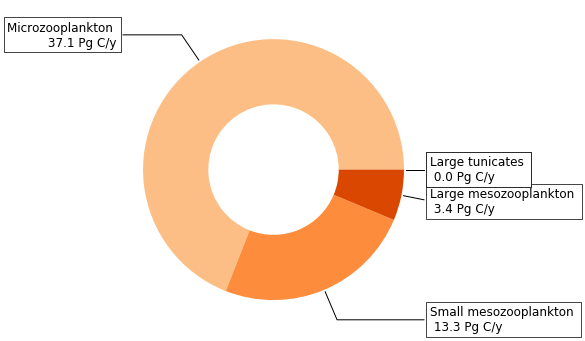

In [126]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

data=[v for v in ingest_data.values()]
labels=["{:s} \n {:.1f} Pg C/y".format(k,v/10.) for k,v in ingest_data.items()]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, colors=colors[1:])#sns.color_palette()[1:])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center", size='large')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.25*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Production")

#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_heterotrophic_ingestion.png', dpi=150, bbox_inches='tight')

### Production Data

In [127]:
#bprod100 = (ds.jprod_nbact_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smzprod100 = (ds.jprod_nsmz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
mdzprod100 = (ds.jprod_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgzprod100 = (ds.jprod_nlgz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smtprod100 = (ds.jprod_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtprod100 = (ds.jprod_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e14
zprod_data={'Microzooplankton': smzprod100.values/divisor,
     'Small mesozooplankton': mdzprod100.values/divisor,
     'Large mesozooplankton': lgzprod100.values/divisor,
     'Small tunicates': smtprod100.values/divisor,
     'Large tunicates': lgtprod100.values/divisor}

print(zprod_data)

{'Microzooplankton': 84.78592396689407, 'Small mesozooplankton': 36.09673588539392, 'Large mesozooplankton': 9.28742788562944, 'Small tunicates': -2.9263002e-07, 'Large tunicates': -9.5509832e-07}


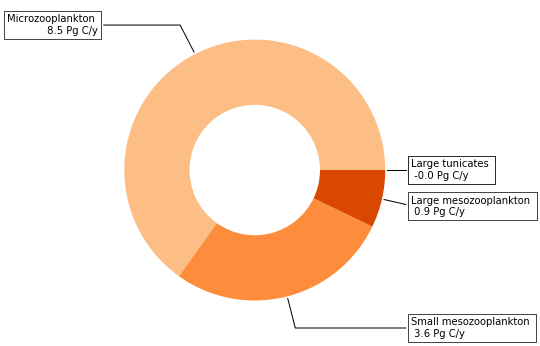

In [128]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

data=[v for v in zprod_data.values()]
labels=["{:s} \n {:.1f} Pg C/y".format(k,v/10.) for k,v in zprod_data.items()]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, colors=colors[1:])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.25*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Production")

#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_heterotrophic_prod.png', dpi=150, bbox_inches='tight')

### Remineralization

In [129]:
bremin100 = (ds.jremin_n_nbact_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smzremin100 = (ds.jremin_n_nsmz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
mdzremin100 = (ds.jremin_n_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgzremin100 = (ds.jremin_n_nlgz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smtremin100 = (ds.jremin_n_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtremin100 = (ds.jremin_n_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e14
remin_data={'Bacteria': bremin100.values/divisor,
     'Microzooplankton': smzremin100.values/divisor,
     'Small mesozooplankton': mdzremin100.values/divisor,
     'Large mesozooplankton': lgzremin100.values/divisor,
     'Small tunicates': smtremin100.values/divisor,
     'Large tunicates': lgtremin100.values/divisor}

print(remin_data)

{'Bacteria': 176.8939403922637, 'Microzooplankton': 174.00132286808065, 'Small mesozooplankton': 56.28249161859072, 'Large mesozooplankton': 14.16270297694208, 'Small tunicates': 0.0, 'Large tunicates': 0.0}


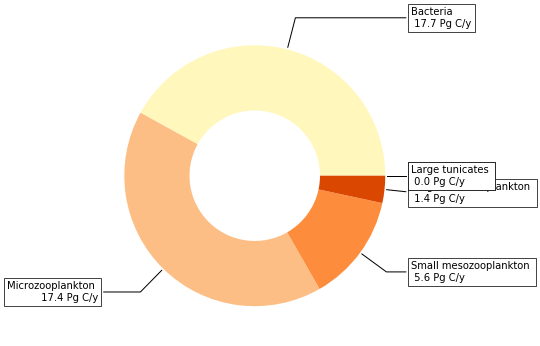

In [130]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

data=[v for v in remin_data.values()]
labels=["{:s} \n {:.1f} Pg C/y".format(k,v/10.) for k,v in remin_data.items()]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.25*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Production")

#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_heterotrophic_respiration.png', dpi=150, bbox_inches='tight')

### DOC prod

In [131]:
smzremin100 = (ds.jprod_don_nsmz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
mdzremin100 = (ds.jprod_don_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smtremin100 = (ds.jprod_don_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtremin100 = (ds.jprod_don_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e14
donprod_data={
     'Microzooplankton': smzremin100.values/divisor,
     'Small mesozooplankton': mdzremin100.values/divisor,
     'Small tunicates': smtremin100.values/divisor,
     'Large tunicates': lgtremin100.values/divisor}

print(donprod_data)


{'Microzooplankton': 92.77235659800576, 'Small mesozooplankton': 13.25266383142912, 'Small tunicates': 0.0, 'Large tunicates': 0.0}


In [132]:
idx=[1,2,4,5]
idx=[1,2]

In [133]:
# fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

# data=[v for v in donprod_data.values()]
# labels=["{:s} \n {:.1f} Pg C/y".format(k,v/10.) for k,v in donprod_data.items()]
# wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, colors=[sns.color_palette()[i] for i in idx])

# bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
# kw = dict(arrowprops=dict(arrowstyle="-"),
#           bbox=bbox_props, zorder=0, va="center")

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#     connectionstyle = "angle,angleA=0,angleB={}".format(ang)
#     kw["arrowprops"].update({"connectionstyle": connectionstyle})
#     ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.25*y),
#                 horizontalalignment=horizontalalignment, **kw)

# #ax.set_title("Production")

# #plt.savefig('plots/'+short_casename+'_'+pp_dates+'_don_prod.png', dpi=150, bbox_inches='tight')

### Detritus

In [134]:
bdetprod100 = 0
smzdetprod100 = (ds.jprod_ndet_nsmz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
mdzdetprod100 = (ds.jprod_ndet_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgzdetprod100 = (ds.jprod_ndet_nlgz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smtdetprod100 = (ds.jprod_ndet_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgtdetprod100 = (ds.jprod_ndet_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
hpdetprod100 = (ds.jprod_ndet_hp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
agglosssmp100 = (ds.jaggloss_nsmp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
agglosslgp100 = (ds.jaggloss_nlgp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass


divisor=1e15
zdetprod_data={'Microzoo': smzdetprod100.values/divisor,
              'Sm mesozoo': mdzdetprod100.values/divisor,
              'Lg mesozoo': lgzdetprod100.values/divisor,
              'Sm tunicate': smtdetprod100.values/divisor,
              'Lg tunicate': lgtdetprod100.values/divisor,
              'HTL pred': hpdetprod100.values/divisor,
              'Sm phyto':agglosssmp100.values/divisor,
              'Lg phyto':agglosslgp100.values/divisor}

print(zdetprod_data)

{'Microzoo': 1.952983503863808, 'Sm mesozoo': 2.689473892581376, 'Lg mesozoo': 1.041752572035072, 'Sm tunicate': 2.9263002e-08, 'Lg tunicate': 9.5509832e-08, 'HTL pred': 0.838254605631488, 'Sm phyto': 0.377491017433088, 'Lg phyto': 1.773873301291008}


In [135]:
np.sum([k for k in zdetprod_data.values()])

8.673829017608675

In [136]:
idx=[1,2,3,4,5,6,7,8]

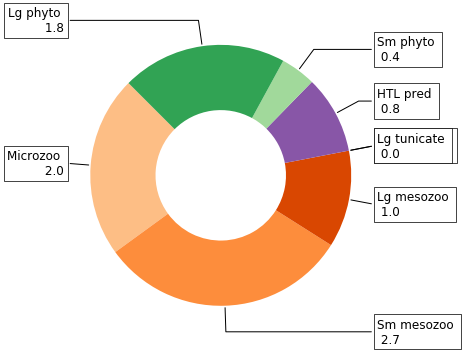

In [137]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

data=[v for v in zdetprod_data.values()]
labels=["{:s} \n {:.1f}".format(k,v) for k,v in zdetprod_data.items()]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=135, colors=[colors[i] for i in idx])#[2:]

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center", size='large')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Production")

plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_detritus_production.png', dpi=150, bbox_inches='tight')
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_detritus_production.pdf', dpi=150, bbox_inches='tight')

### Primary Production

In [138]:
diazprod100 = (ds.jprod_ndi_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
smpprod100 = (ds.jprod_nsmp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
lgpprod100 = (ds.jprod_nlgp_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e14
pprod_data={'Diazotrophs': diazprod100.values/divisor,
     'Small Phytoplankton': smpprod100.values/divisor,
     'Large Phytoplankton': lgpprod100.values/divisor}

print(pprod_data)

{'Diazotrophs': 2.410567172096, 'Small Phytoplankton': 447.7289516708659, 'Large Phytoplankton': 102.47300194500608}


In [139]:
idx=[9,7,8]

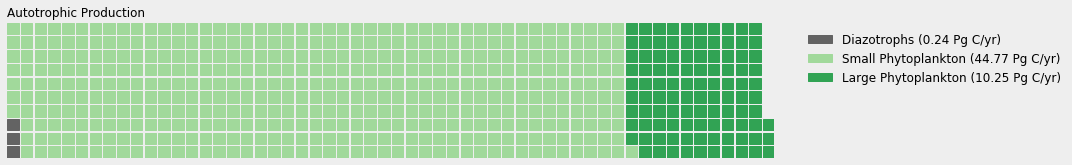

In [140]:
fig = plt.figure(
    FigureClass=Waffle, 
    figsize=(15,10),
    rows=10,
    values=pprod_data, 
    colors=[colors[i] for i in idx],
    title={'label': 'Autotrophic Production', 'loc': 'left'},
    labels=["{0} ({1} Pg C/yr)".format(k, np.round(v/10,2)) for k, v in pprod_data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.03,1), 'framealpha': 0, 'fontsize':12}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')

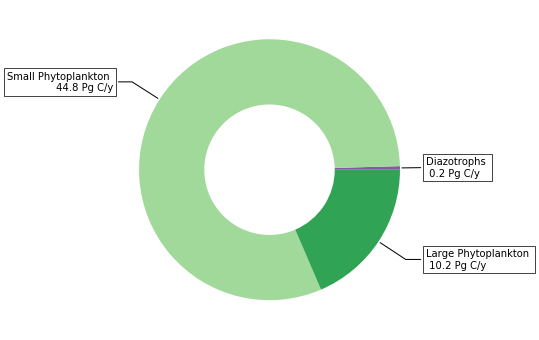

In [141]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

data=[v for v in pprod_data.values()]
#labels=[k for k in pprod_data.keys()]
labels=["{:s} \n {:.1f} Pg C/y".format(k,v/10.) for k,v in pprod_data.items()]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, colors=colors[6:])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.25*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Production")

#plt.savefig('plots/'+short_casename+'_'+pp_dates+'_autotrophic_prod.png', dpi=150, bbox_inches='tight')

In [142]:
hplossmdz100 = (ds.jhploss_nmdz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
hplosslgz100 = (ds.jhploss_nlgz_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
hplosssmt100 = (ds.jhploss_nsmt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass
hplosslgt100 = (ds.jhploss_nlgt_100 * grid.areacello).sum(dim=['xh','yh']).mean(dim='time') * seconds_per_year * cobalt_n_2_c * carbon_molar_mass

divisor=1e15
hploss_data={'Sm mesozoo': hplossmdz100.values/divisor,
     'Lg mesozoo': hplosslgz100.values/divisor,
    'Sm tunicate': hplosssmt100.values/divisor,
    'Lg tunicate': hplosslgt100.values/divisor}

print(hploss_data)

{'Sm mesozoo': 1.530063577153536, 'Lg mesozoo': 0.864949773533184, 'Sm tunicate': 0.0, 'Lg tunicate': 0.0}


In [143]:
idx=[2,3,4,5]

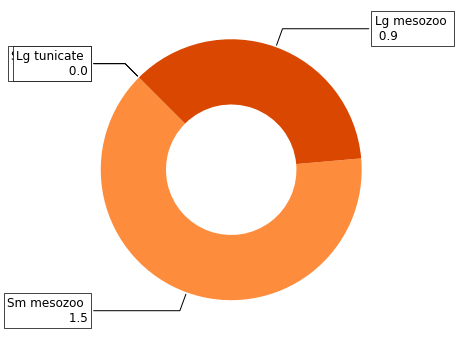

In [144]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

data=[v for v in hploss_data.values()]
labels=["{:s} \n {:.1f}".format(k,v) for k,v in hploss_data.items()]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=135, colors=[colors[i] for i in idx])#[2:]

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center", size='large')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.15*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Production")

plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_HTL_loss.png', dpi=150, bbox_inches='tight')
plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_HTL_loss.pdf', dpi=150, bbox_inches='tight')